In [1]:
cd "/Users/daveboettger/Google Drive/PbGeneral/Photogrammetry/mirrorfithmc"

/Users/daveboettger/Google Drive/PbGeneral/Photogrammetry/mirrorfithmc


In [2]:
import sys
sys.path.append('.')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymc3 as pm
import test_cloud_align as tc

In [3]:
model=tc.load_multi_model_moons()

Align_DS2_to_DS1 fitmap is {'tx': True, 'ty': True, 'tz': True, 'rx': True, 'ry': True, 'rz': True, 's': True, 'rescale_errors': True}
Align_DS3_to_DS1 fitmap is {'tx': True, 'ty': True, 'tz': True, 'rx': True, 'ry': True, 'rz': True, 's': True, 'rescale_errors': True}


In [4]:
with model as model:
    trace=pm.load_trace('moons_alignments/multigaussianalign_xyzerror/')

In [13]:
model.vars,trace.varnames,model.test_point

([MultiAlign_error_scale_DS1_lowerbound__,
  MultiAlign_error_scale_DS2_lowerbound__,
  MultiAlign_error_scale_DS3_lowerbound__,
  Align_DS2_to_DS1_tx,
  Align_DS2_to_DS1_ty,
  Align_DS2_to_DS1_tz,
  Align_DS2_to_DS1_rx,
  Align_DS2_to_DS1_ry,
  Align_DS2_to_DS1_rz,
  Align_DS2_to_DS1_s,
  Align_DS3_to_DS1_tx,
  Align_DS3_to_DS1_ty,
  Align_DS3_to_DS1_tz,
  Align_DS3_to_DS1_rx,
  Align_DS3_to_DS1_ry,
  Align_DS3_to_DS1_rz,
  Align_DS3_to_DS1_s],
 ['MultiAlign_error_scale_DS1_lowerbound__',
  'MultiAlign_error_scale_DS2_lowerbound__',
  'MultiAlign_error_scale_DS3_lowerbound__',
  'Align_DS2_to_DS1_tx',
  'Align_DS2_to_DS1_ty',
  'Align_DS2_to_DS1_tz',
  'Align_DS2_to_DS1_rx',
  'Align_DS2_to_DS1_ry',
  'Align_DS2_to_DS1_rz',
  'Align_DS2_to_DS1_s',
  'Align_DS3_to_DS1_tx',
  'Align_DS3_to_DS1_ty',
  'Align_DS3_to_DS1_tz',
  'Align_DS3_to_DS1_rx',
  'Align_DS3_to_DS1_ry',
  'Align_DS3_to_DS1_rz',
  'Align_DS3_to_DS1_s',
  'MultiAlign_error_scale_DS1',
  'MultiAlign_error_scale_DS2',
  '

In [14]:
errorscale1=trace.get_values('MultiAlign_error_scale_DS1')

In [15]:
np.mean(np.abs(errorscale1),axis=0)

array([2.33948397, 4.81461878, 0.80602403])

In [16]:
errorscale2=trace.get_values('MultiAlign_error_scale_DS2')

In [17]:
np.mean(np.abs(errorscale2),axis=0)

array([0.60098348, 1.90002672, 0.48478636])

In [18]:
errorscale3=trace.get_values('MultiAlign_error_scale_DS3')

In [19]:
np.mean(np.abs(errorscale3),axis=0)

array([2.62237737, 7.04937595, 0.92724543])

In [22]:
xlevels=tc.mf.util.find_credible_levels(x=errorscale2[:,0],y=errorscale3[:,0])
ylevels=tc.mf.util.find_credible_levels(errorscale2[:,1],errorscale3[:,1])
zlevels=tc.mf.util.find_credible_levels(errorscale2[:,2],errorscale3[:,2])
xlevels, ylevels, zlevels

([0.0,
  0.8281299682938529,
  1.6562599365889297,
  12.42194952442248,
  43.0627583513342],
 [0.0,
  0.46660769395980367,
  0.9332153879215701,
  4.666076939607851,
  17.264484676546104],
 [0.0,
  5.22864859522083,
  10.45729719044166,
  73.20108033310368,
  282.347024141971])

Text(0, 0.5, 'Errorscale3')

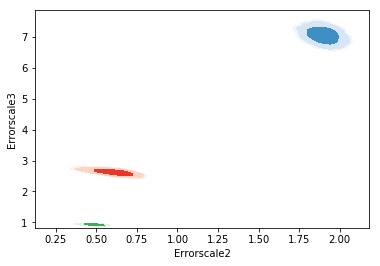

In [24]:
ax = sns.kdeplot(errorscale2[:,0], errorscale3[:,0],cmap="Reds",shade=True, shade_lowest=False, levels=xlevels)
ax = sns.kdeplot(errorscale2[:,1], errorscale3[:,1],cmap="Blues",shade=True, shade_lowest=False, levels=ylevels)
ax = sns.kdeplot(errorscale2[:,2], errorscale3[:,2],cmap="Greens",shade=True, shade_lowest=False, levels=zlevels)
ax.set_xlabel('Errorscale2')
ax.set_ylabel('Errorscale3')

In [25]:
diffs,errors = model.calc_diff(trace=trace)

In [26]:
diffs.keys()

dict_keys(['DS1-DS2', 'DS1-DS3', 'DS2-DS3'])

In [27]:
sigerror = {}
for k in diffs:
    sigerror[k] = np.mean(diffs[k]/errors[k], axis=0)


In [28]:
np.shape(sigerror['DS1-DS3'])

(3, 1627)

In [29]:
for k in sigerror:
    print(k,np.sum(np.abs(sigerror[k].flat)<1)/len(sigerror[k].flat))

DS1-DS2 0.7113296455644336
DS1-DS3 0.6926859250153657
DS2-DS3 0.7051833640647408


In [30]:
for k in sigerror:
    print(k,np.sum(np.abs(sigerror[k].flat)<2)/len(sigerror[k].flat))

DS1-DS2 0.9651710715017414
DS1-DS3 0.9467322270026634
DS2-DS3 0.9543126408522844


(array([  1.,   0.,   0.,   1.,   0.,   1.,   3.,   6.,  25.,  31.,  72.,
         86., 141., 189., 221., 196., 186., 154., 113.,  78.,  58.,  34.,
         16.,   7.,   3.,   2.,   1.,   1.,   0.,   1.]),
 array([-4.81770893, -4.50266934, -4.18762975, -3.87259016, -3.55755057,
        -3.24251098, -2.9274714 , -2.61243181, -2.29739222, -1.98235263,
        -1.66731304, -1.35227345, -1.03723387, -0.72219428, -0.40715469,
        -0.0921151 ,  0.22292449,  0.53796408,  0.85300366,  1.16804325,
         1.48308284,  1.79812243,  2.11316202,  2.42820161,  2.74324119,
         3.05828078,  3.37332037,  3.68835996,  4.00339955,  4.31843914,
         4.63347872]),
 <a list of 30 Patch objects>)

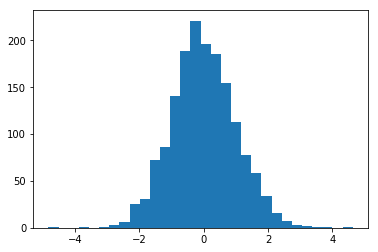

In [31]:
plt.hist(sigerror['DS1-DS3'][2,:],30)

In [21]:
diffdists = np.linalg.norm(diffs,axis=1)

In [22]:
np.shape(diffdists)

(8000, 1627)

In [23]:
meandiffs=np.mean(diffs,axis=0)

In [24]:
meanerrors=np.mean(errors,axis=0)

In [30]:
np.mean(np.abs(meandiffs)[2,:])

0.011321019781213073

In [31]:
np.mean(np.abs(meanerrors)[2,:])

0.014408030664156182

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1afb3b940>,
      dtype=object)

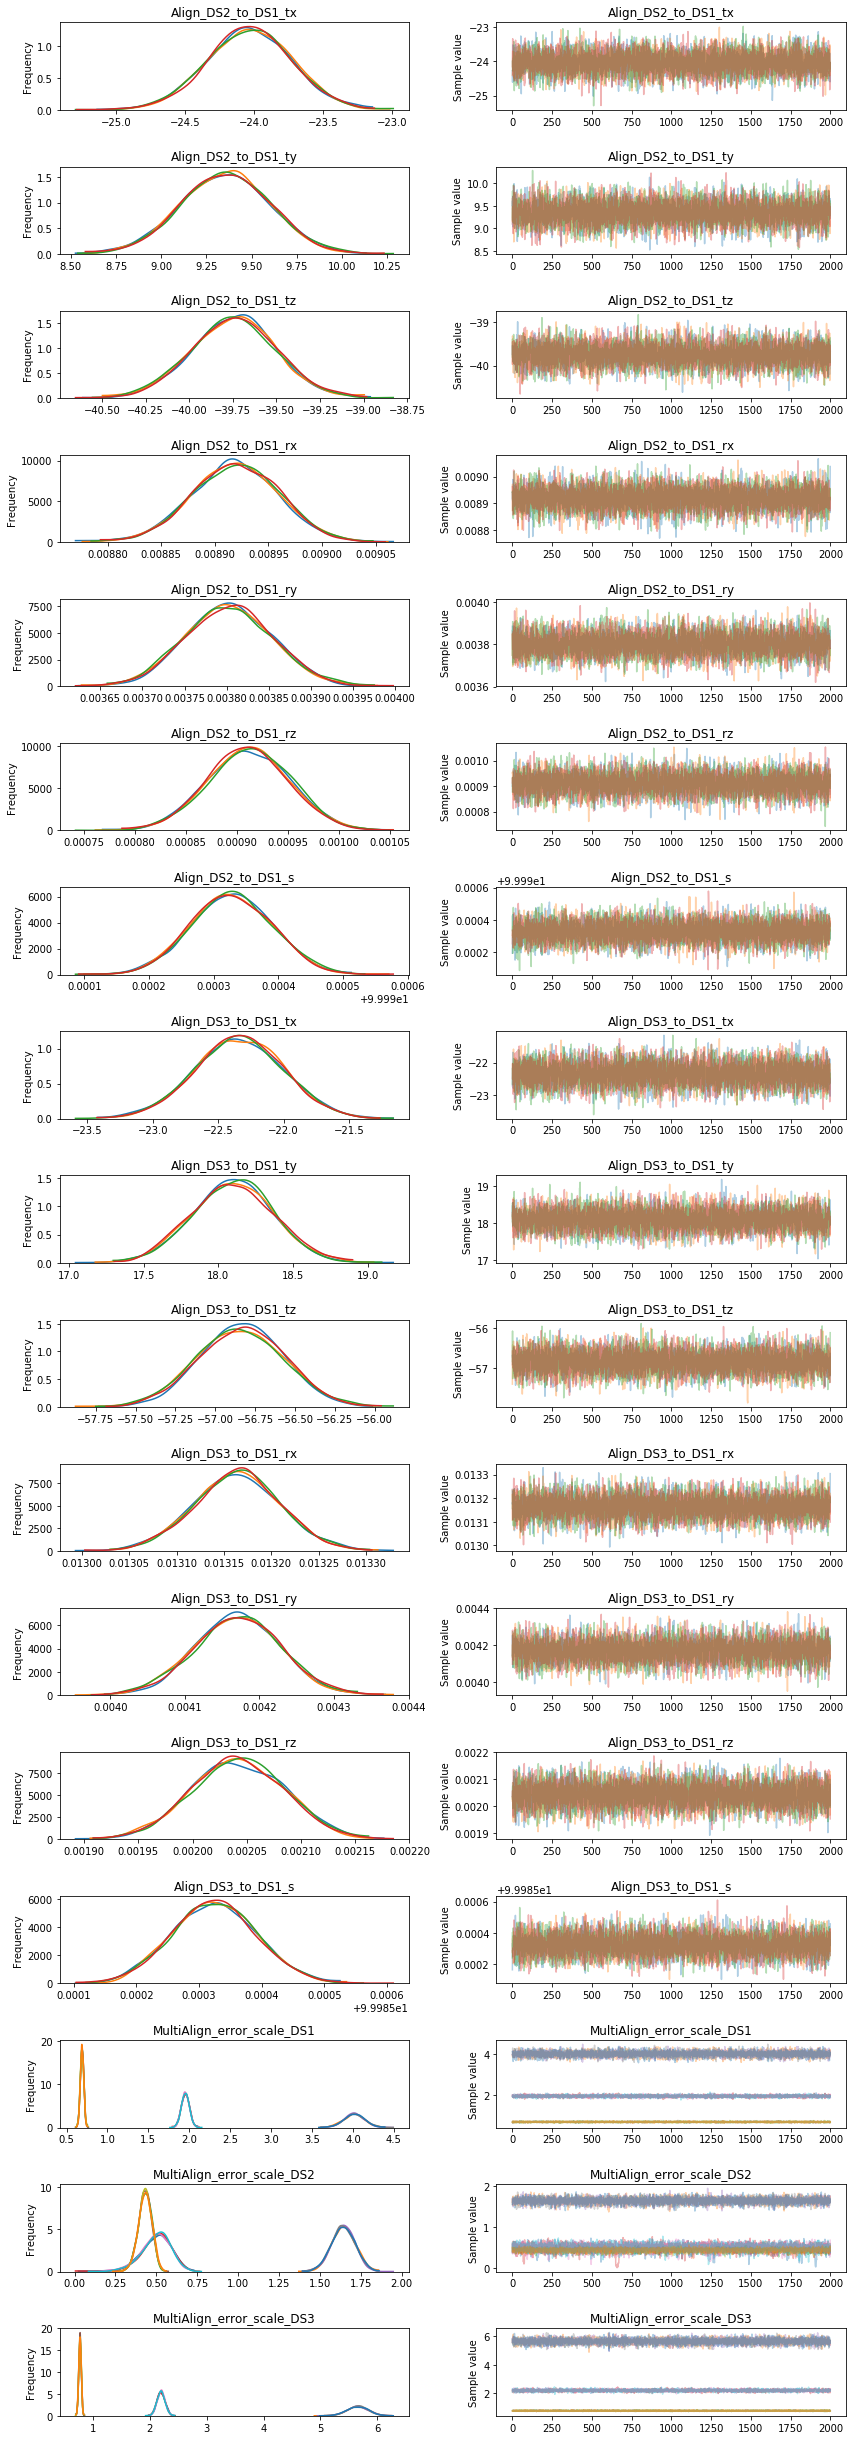

In [61]:
pm.traceplot(trace)

In [33]:
trans,uncert=model.mean_transform(trace)

In [34]:
trans

effective translation: [-0.02257837  0.01820981 -0.05654006]
R: [[ 9.99999997e-01 -3.45017761e-05  7.18308461e-05]
 [ 3.45182912e-05  9.99999973e-01 -2.29927420e-04]
 [-7.18229112e-05  2.29929899e-04  9.99999971e-01]]
effective scale factor: 0.9998542798289874

In [35]:
uncert

{'tx': 0.4781491134139967,
 'ty': 0.38495292424267763,
 'tz': 0.3688371657660768,
 'rx': 6.1557140770925e-05,
 'ry': 7.850125984879725e-05,
 'rz': 6.047663473136983e-05,
 's': 8.99220616433563e-05}

In [36]:
ds2tprime=(trans*model.ds2t)

In [37]:
newpos = ds2tprime.pos.eval()

In [38]:
final_diffs=(model.ds1t.pos-newpos).eval()

In [39]:
final_diff_dists = np.linalg.norm(final_diffs,axis=0)

(array([147., 498., 500., 279., 120.,  51.,  23.,   6.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.00103768, 0.01069109, 0.02034449, 0.02999789, 0.0396513 ,
        0.0493047 , 0.05895811, 0.06861151, 0.07826491, 0.08791832,
        0.09757172, 0.10722512, 0.11687853, 0.12653193, 0.13618534,
        0.14583874, 0.15549214, 0.16514555, 0.17479895, 0.18445235,
        0.19410576]),
 <a list of 20 Patch objects>)

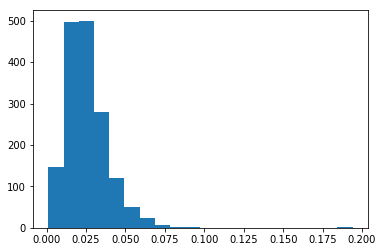

In [40]:
plt.hist(final_diff_dists,20)